<h1
  style="
    text-align: center;
    border: 2px solid red;
    border-radius: 8px;
    padding: 8px;
  "
>
  Programming for Data Science TP 03
</h1>


In [231]:
# Downloading the dataset from github.
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

!ls

base_dir = 'Fruit-Images-Dataset/'

!ls Fruit-Images-Dataset/

fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.
distances.npy	      expectedResults.npy   np_test_images.npy	 results.npy  test_images_chs.npy
expected_results.npy  Fruit-Images-Dataset  np_train_images.npy  sample_data  train_images_chs.npy
LICENSE  papers  readme.md  src  Test  test-multiple_fruits  Training


In [232]:
# displaying the available classes.
!ls Fruit-Images-Dataset/Training/

'Apple Braeburn'        Clementine	    Mangostan		  Pineapple
'Apple Crimson Snow'    Cocos		    Maracuja		 'Pineapple Mini'
'Apple Golden 1'        Corn		   'Melon Piel de Sapo'  'Pitahaya Red'
'Apple Golden 2'       'Corn Husk'	    Mulberry		  Plum
'Apple Golden 3'       'Cucumber Ripe'	    Nectarine		 'Plum 2'
'Apple Granny Smith'   'Cucumber Ripe 2'   'Nectarine Flat'	 'Plum 3'
'Apple Pink Lady'       Dates		   'Nut Forest'		  Pomegranate
'Apple Red 1'	        Eggplant	   'Nut Pecan'		 'Pomelo Sweetie'
'Apple Red 2'	        Fig		   'Onion Red'		 'Potato Red'
'Apple Red 3'	       'Ginger Root'	   'Onion Red Peeled'	 'Potato Red Washed'
'Apple Red Delicious'   Granadilla	   'Onion White'	 'Potato Sweet'
'Apple Red Yellow 1'   'Grape Blue'	    Orange		 'Potato White'
'Apple Red Yellow 2'   'Grapefruit Pink'    Papaya		  Quince
 Apricot	       'Grapefruit White'  'Passion Fruit'	  Rambutan
 Avocado	       'Grape Pink'	    Peach		  Raspberry
'Avocado ripe'	       'Grape White'	   'Peach

In [233]:
#@title Read training data.

import os
import cv2

# Read training data, we will use only the next classes in our TP.
CATEGORIES = ["Apple Red 1","Apricot","Avocado","Banana", "Cherry 1", "Fig","Kiwi", "Grape Blue", "Lemon", "Tomato 3", "Strawberry", "Watermelon"] 	# we work with three classes of Apple and Pear
CLASS_NAMES = CATEGORIES

train_images = []
train_dir = os.path.join(base_dir, 'Training/')										              # set the training directory in the path

for category in CATEGORIES:															                        # iterate to each category
    path = os.path.join(train_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):													                    # iterate to each image in the category
        if(image.endswith('jpg') and not image.startswith('.')):
            img_array = cv2.imread(os.path.join(path,image), cv2.COLOR_BGR2RGB)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            train_images.append([img_array, class_num])								          # save the image in training data array

print("Training images: ", len(train_images))

Training images:  6742


In [234]:
#@title Read test data.
test_images = []
test_dir = os.path.join(base_dir, 'Test/')										                  # set the test directory in the path

for category in CATEGORIES:															                        # iterate to each category
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):													                    # iterate to each image in the category
        if(image.endswith('jpg') and not image.startswith('.')):
            img_array = cv2.imread(os.path.join(path,image), cv2.COLOR_BGR2RGB)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            test_images.append([img_array, class_num])								          # save the image in training data array

print("Test images: ", len(test_images))

Test images:  2250


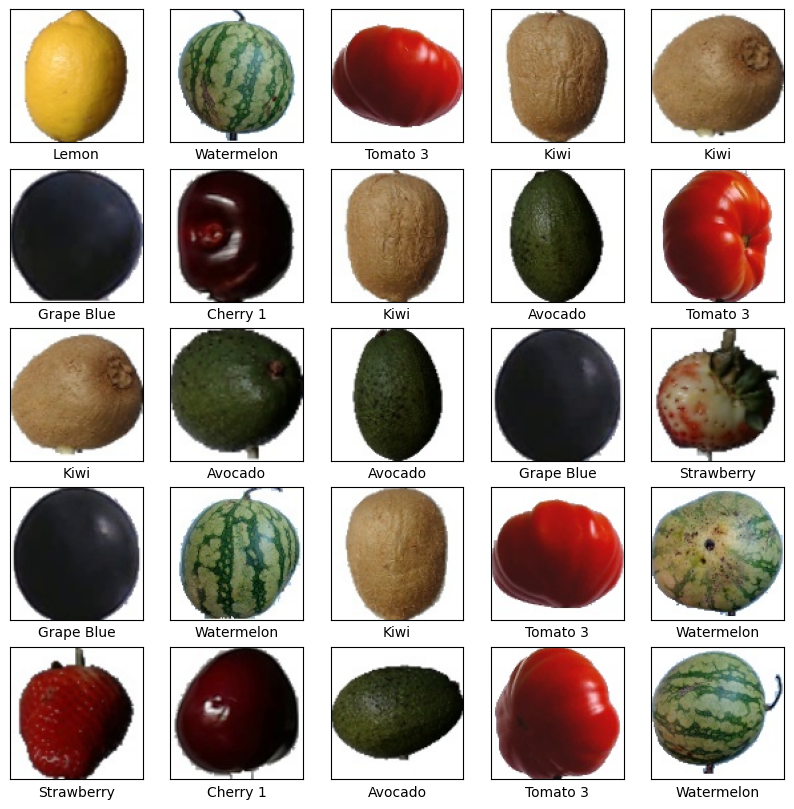

In [235]:
#@title Preview random training images.
import random
import numpy as np
from matplotlib import pyplot as plt

img_idx = random.sample(range(len(train_images)), 25)
img_idx = np.array(img_idx)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx[i]][0])
    plt.xlabel(CLASS_NAMES[train_images[img_idx[i]][1]])
plt.show()

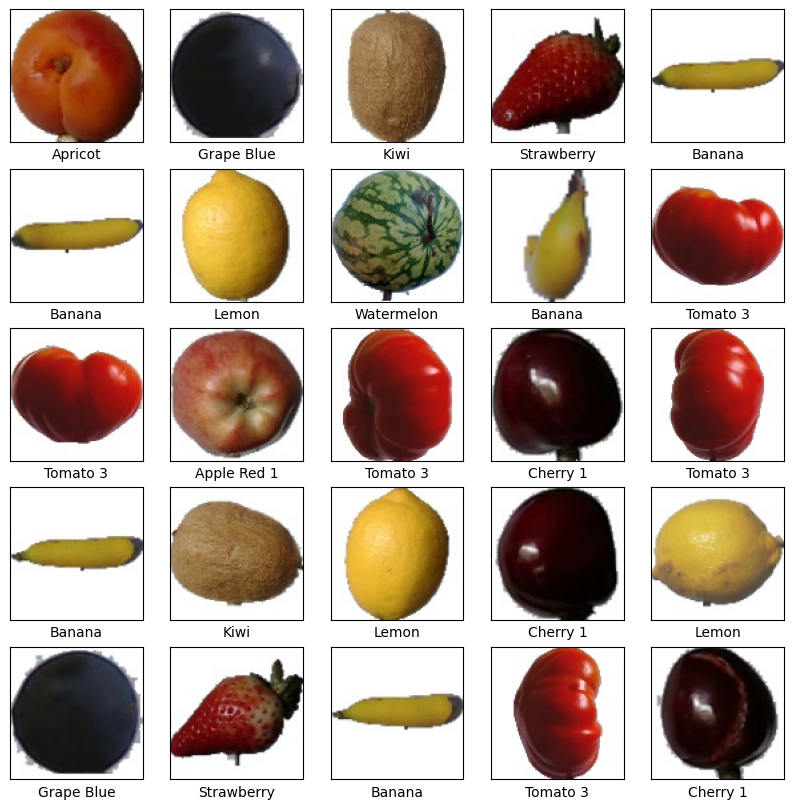

In [236]:
#@title Preview random testing images.
t_img_idx = random.sample(range(len(test_images)), 25)
t_img_idx = np.array(t_img_idx)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[t_img_idx[i]][0])
    plt.xlabel(CLASS_NAMES[test_images[t_img_idx[i]][1]])
plt.show()

# Classification

In [237]:
def to012(matrix):
    bins = np.array([0, 86, 172, 256])  # Define the bin edges
    return np.digitize(matrix, bins) - 1  # Assign values based on bin indices


def reduceVals(image):
    image_copy = image.copy()
    red_m = to012(image_copy[..., 0])
    green_m = to012(image_copy[..., 1])
    blue_m = to012(image_copy[..., 2])
    return red_m, green_m, blue_m


def colorHistogram(image):
    red_m, green_m, blue_m = reduceVals(image)
    hist, _ = np.histogram(9 * red_m + 3 * green_m + blue_m, bins=range(26))
    return hist


def euclideanDistance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

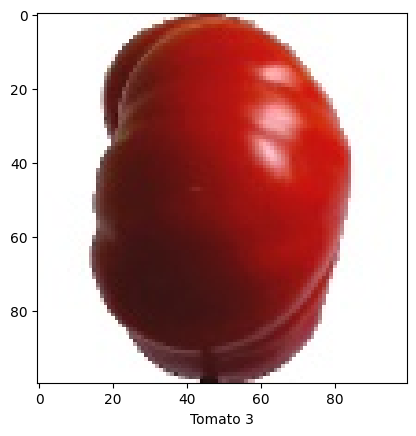

In [238]:
i = np.random.randint(0,25) # a random image index from the random set
plt.imshow(test_images[t_img_idx[i]][0])
plt.xlabel(CLASS_NAMES[test_images[t_img_idx[i]][1]])
plt.show()

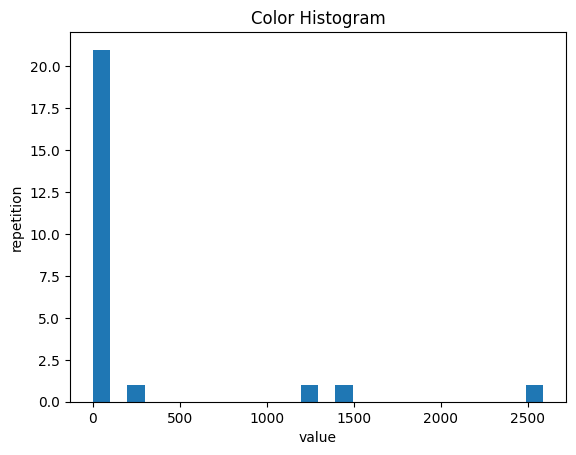

In [239]:
plt.hist(colorHistogram(test_images[t_img_idx[i]][0]), bins=26)
plt.title("Color Histogram")
plt.xlabel("value")
plt.ylabel("repetition")
plt.show()

In [240]:
def knnClassification(distances):
    K = len(CLASS_NAMES)
    k_nearest_array = np.argpartition(distances, K+1)[:, :K]  # Finding indices of K nearest neighbors for each test image
    k_nearest_classes_array = np.array([train_images[index][1] for index in k_nearest_array.ravel()]).reshape(k_nearest_array.shape)  # Getting classes of K nearest neighbors
    counts_array = np.apply_along_axis(lambda x: np.bincount(x, minlength=K), axis=1, arr=k_nearest_classes_array)  # Counting occurrences of each class in the nearest neighbor array
    most_repeated_element_array = np.argmax(counts_array, axis=1)  # Finding the most repeated class for each test image
    return most_repeated_element_array

In [241]:
np_train_images = np.array(train_images)
train_images_chs = np.array([colorHistogram(image) for image in np_train_images[:, 0]])  # Calculating training images color histograms

np_test_images = np.array(test_images)
test_images_chs = np.array([colorHistogram(image) for image in np_test_images[:, 0]])  # Calculating testing images color histograms

distances = np.array([euclideanDistance(img_ch, train_images_chs) for img_ch in test_images_chs])  # Calculating distances between test images and train images

results = knnClassification(distances)
expected_results = np_test_images[:,1]

<ipython-input-241-24959d471d6e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_train_images = np.array(train_images)
<ipython-input-241-24959d471d6e>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_test_images = np.array(test_images)


In [242]:
np.save("train_images_chs.npy", train_images_chs)
np.save("test_images_chs.npy", test_images_chs)
np.save("results.npy", results)
np.save("expected_results.npy", expected_results)
np.save("distances.npy", distances)

In [243]:
import numpy as np

train_images_chs = np.load("train_images_chs.npy")
test_images_chs = np.load("test_images_chs.npy")
results = np.load("results.npy")
# expected_results = np.load("expected_results.npy")
distances = np.load("distances.npy")

In [244]:
accuracy = np.mean(np.equal(results, expected_results)) * 100
print(f"accuracy: {accuracy:.2f}%")

accuracy: 99.20%
